# Algae Visualization

For the first week of July, I've decided to use the dataset provided by [/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful) for their January 2018 DataViz Battle. I missed these battles when these were still ongoing but I've figured I could use these to enhance my skills in data analysis and data visualization. For this challenge, I will present my thoughts on coming up with possible insights and experiments as well as to what chart should be used. It's gonna be really messy ahead as this is my first challenge but I hope I get familiarized with the syntax and hone my data analysis as well!

The [dataset](https://www.reddit.com/r/dataisbeautiful) shows the specific growth rate of algae (divisions per day) at different light intensities and temperatures. First, I'll load the necessary libraries and the dataset that I'll be using.

In [204]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [205]:
df = pd.read_csv('algae.csv')

In [206]:
df.head()

,Species,Temperature,Light Intensity,Growth Rate
0,Caloneis schroderi,5,5000,-0.01
1,Caloneis schroderi,5,2500,-0.50
2,Caloneis schroderi,10,5000,-0.10
3,Caloneis schroderi,10,2500,0.25
4,Caloneis schroderi,25,5000,0.28


Now that I've loaded the data, I listed a few questions on what I want to know regarding this dataset.
1. What species of algae has the highest and lowest growth rate per condition (light intensity and temperature)?
2. What condition is the best and worst for every species of algae?
3. What is the correlation of temperature and light intensity with the growth rate?

### 1. What species of algae has the highest and lowest growth rate per condition (light intensity and temperature)?

To get its results, I filtered the dataframe to set a specific condition and print the species name with the lowest and highest growth rate. The following code was used to get the lowest growth rate with temperature equal to 5 and light intensity equal to 5000:

In [211]:
temp = 5;
light_intensity = 5000;

df_res = df.loc[(df['Temperature'] == temp) & (df['Light Intensity'] == light_intensity)]
df_res.loc[df_res['Growth Rate'].idxmin()]['Species']

'Isochrysis aff. galbana'

For temperature = 5 and light intensity = 5000, the species with the highest growth rate was Skeletonema costatum, while the species with the lowest growth rate was Isochrysis aff. galbana. But I want to instantly find this, and using other conditions as well.

The first thing I thought was to make a heatmap to visualize the species with the highest and lowest growth rate according to light intensity and temperature. I transformed the data into a pivot table for easy viewing as well as for easy access of data.

In [212]:
df2 = df.copy()
df2 = df2.pivot_table(index='Species', columns=['Temperature', 'Light Intensity'])
df2

Growth Rate                                \
Temperature                              5           10          25         
Light Intensity                        2500  5000  2500  5000  2500  5000   
Species                                                                     
Caloneis schroderi                    -0.50 -0.01  0.25 -0.10  0.30  0.28   
Chaetoceros gracilis                  -0.05 -0.01  0.07  0.16  0.39  0.52   
Chaetoceros simplex                   -0.01 -0.06  0.55  0.27  0.52  0.47   
Chlorella ellipsoidea                  0.02  0.03  0.53  0.58  0.85  0.88   
Chlorella stigmatophora                0.24  0.01  0.24  0.36  0.56  0.78   
Chlorella vulgaris (freshwater)        0.00 -0.25  0.17  0.21  0.67  0.68   
Cyclotella sp. NUFP-9                  0.08  0.16 -0.10  0.00  0.00  0.00   
Dunaniella tertiolecta                 0.17  0.28  0.42  0.43  0.64  0.60   
Hanzchia marina                       -0.07 -0.36 -0.21 -0.68  0.15  0.21   
Isochrysis aff. galbana               -0.67 -0.62 -0.14  0.06  0.81  0.78   
Isochrysis galbana                    -0.07 -0.57  0.25  0.42  0.55  0.55   
Nannochloris salina                    0.07  0.06  0.54  0.04 -0.34 -0.32   
Nannochlorois oculata                 -0.03  0.01  0.04  0.01  0.92  0.85   
Navicula incerta                       0.20  0.16  0.22  0.37  0.37  0.39   
Nitzscia sp.                           0.12 -0.10  0.23  0.20  0.29  0.23   
Skeletonema costatum                   0.34  0.29  0.61  0.66  0.67  0.60   
Tetraselmus suecica                   -0.02  0.04  0.28  0.42  0.44  0.46   
Thalassiosira fluviatilis              0.06  0.03  0.11  0.10  0.10 -0.03   
Thalassiosira sp.                     -0.17 -0.29 -0.12 -0.04  0.15  0.13   

                                             
Temperature                        30        
Light Intensity                  2500  5000  
Species                                      
Caloneis schroderi               0.29  0.38  
Chaetoceros gracilis             0.73  0.62  
Chaetoceros simplex              0.63  0.54  
Chlorella ellipsoidea            0.94  0.98  
Chlorella stigmatophora          0.39  0.66  
Chlorella vulgaris (freshwater) -0.20 -0.29  
Cyclotella sp. NUFP-9           -0.19 -0.18  
Dunaniella tertiolecta           0.45  0.60  
Hanzchia marina                  0.06  0.11  
Isochrysis aff. galbana          0.74  0.76  
Isochrysis galbana               0.51  0.52  
Nannochloris salina              0.06  0.46  
Nannochlorois oculata            1.14  1.09  
Navicula incerta                 0.35  0.48  
Nitzscia sp.                     0.40  0.46  
Skeletonema costatum             0.43  0.48  
Tetraselmus suecica              0.51  0.55  
Thalassiosira fluviatilis        0.23  0.28  
Thalassiosira sp.                0.41  0.40

In [10]:
algae = df['Species'].unique()
cond = ['5,2500', '5,5000', '10,2500', '10,5000', '25,2500', '25,5000', '30,2500', '30,5000']
values = df2.values

Then, I plotted this using matplotlib.

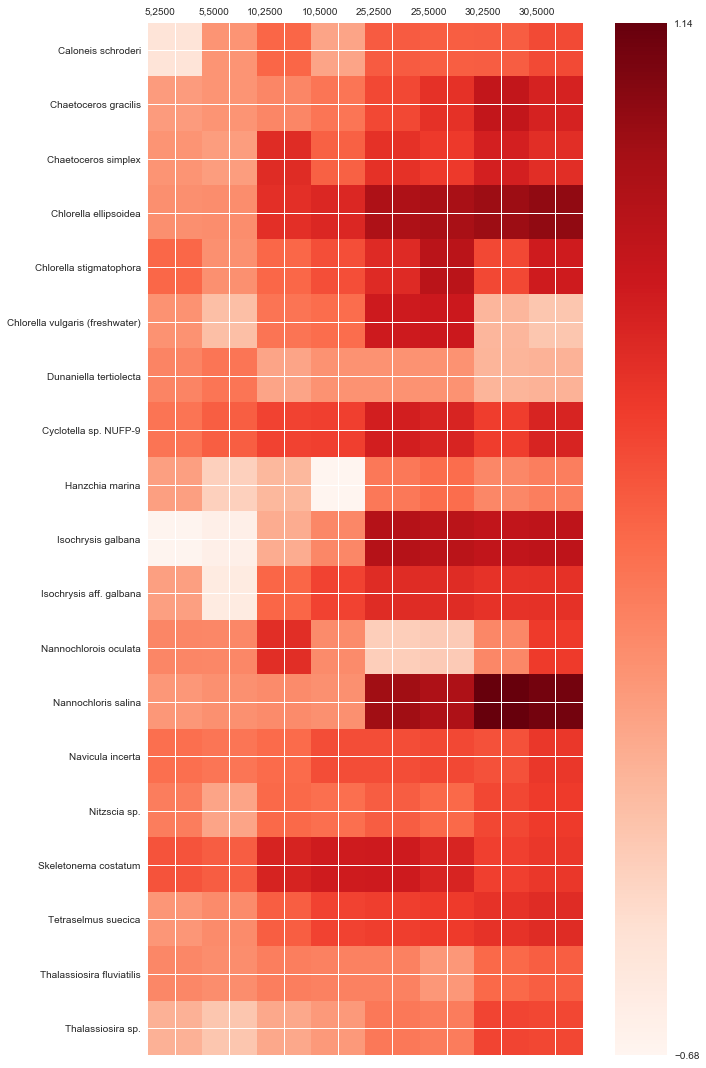

In [213]:
fig, ax = plt.subplots(figsize=(10,15))
heatmap = ax.imshow(values, cmap='Reds')

# We want to show all ticks...
ax.set_yticks(np.arange(len(algae)))
ax.set_xticks(np.arange(len(cond)))
ax.set_yticklabels(algae)
ax.set_xticklabels(cond)

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

cbar = fig.colorbar(heatmap, ticks=[values.min(), values.max()])
tick_spacing = 1

fig.tight_layout()
# plt.savefig('heatmap_algae', dpi=300)
plt.show()

The heatmap can display the species with the highest and lowest growth rates per condition, but still, it confuses the reader as to what is darker and lighter, especially when comparing species with similar shades. (And to be honest, it looks confusing and tiring to actually look for it.)

I thought of another way of showing the data--through bar charts. First, I wrote lines of code to get the rates that I want (excuse for the messy code ahead, I'm still starting out!)

In [214]:
growth_rate = df.loc[(df['Temperature'] == 5) & (df['Light Intensity'] == 2500)]
rate_5_2500 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 5) & (df['Light Intensity'] == 5000)]
rate_5_5000 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 10) & (df['Light Intensity'] == 2500)]
rate_10_2500 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 10) & (df['Light Intensity'] == 5000)]
rate_10_5000 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 25) & (df['Light Intensity'] == 5000)]
rate_25_2500 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 25) & (df['Light Intensity'] == 5000)]
rate_25_5000 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 30) & (df['Light Intensity'] == 2500)]
rate_30_2500 = growth_rate['Growth Rate']

growth_rate = df.loc[(df['Temperature'] == 30) & (df['Light Intensity'] == 5000)]
rate_30_5000 = growth_rate['Growth Rate']

Afterwards, I wrote the code for plotting the horizontal bar chart.

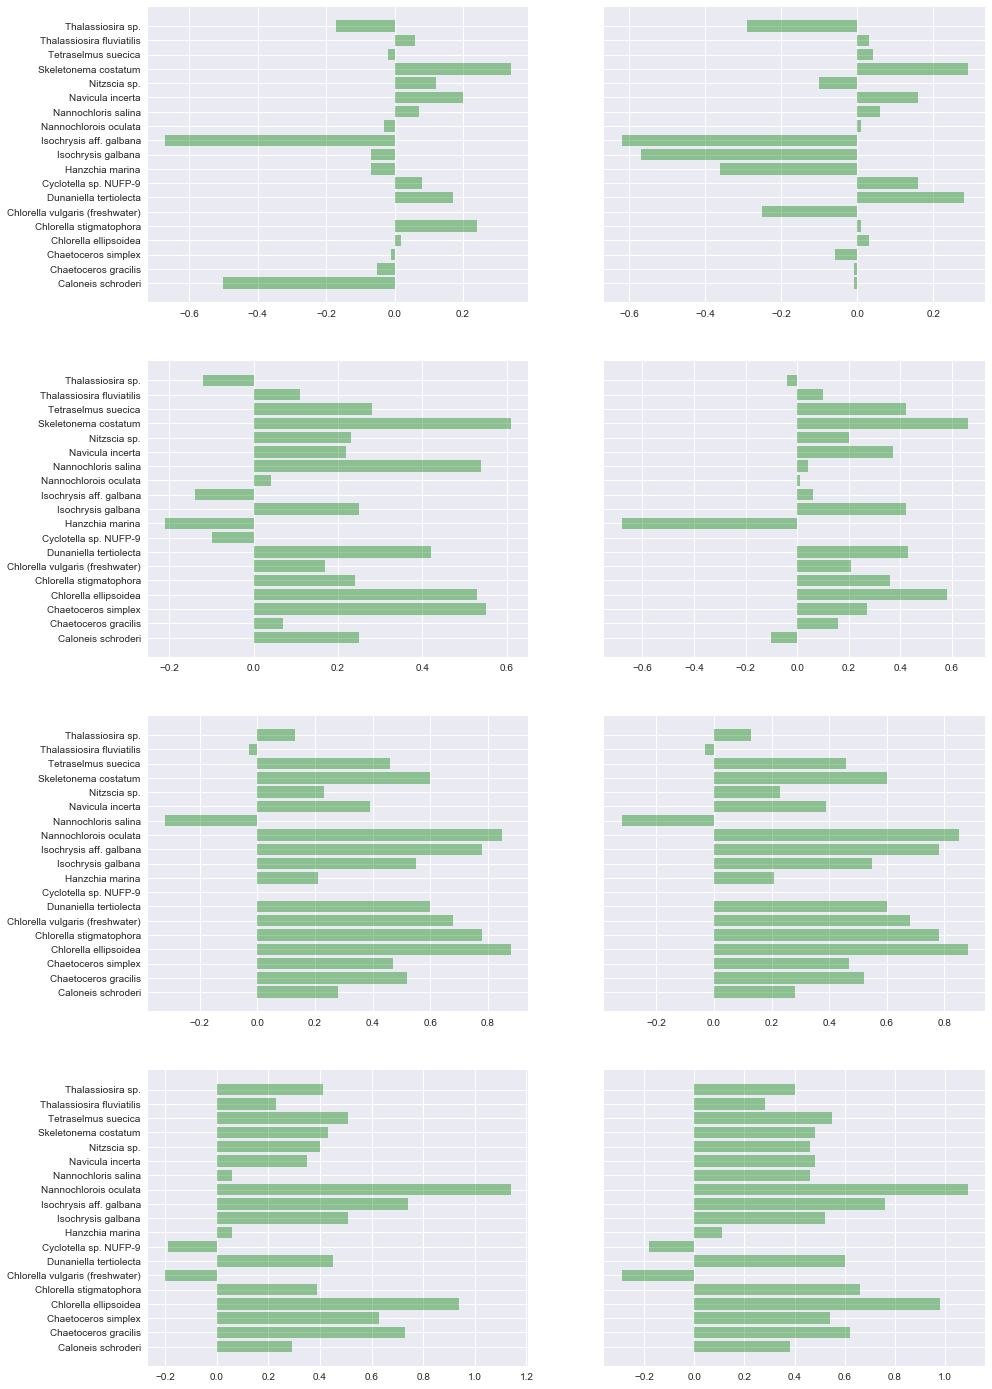

In [215]:
bar_width = 0.8

opacity = 0.4


f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey='row', figsize=(15,25))

r1 = ax1.barh(np.arange(len(algae)), rate_5_2500, bar_width, alpha=opacity, color='green')
r2 = ax2.barh(np.arange(len(algae)), rate_5_5000, bar_width, alpha=opacity, color='green')
r3 = ax3.barh(np.arange(len(algae)), rate_10_2500, bar_width, alpha=opacity, color='green')
r4 = ax4.barh(np.arange(len(algae)), rate_10_5000, bar_width, alpha=opacity, color='green')
r5 = ax5.barh(np.arange(len(algae)), rate_25_2500, bar_width, alpha=opacity, color='green')
r6 = ax6.barh(np.arange(len(algae)), rate_25_5000, bar_width, alpha=opacity, color='green')
r7 = ax7.barh(np.arange(len(algae)), rate_30_2500, bar_width, alpha=opacity, color='green')
r8 = ax8.barh(np.arange(len(algae)), rate_30_5000, bar_width, alpha=opacity, color='green')

ax1.set_yticks(np.arange(len(algae)))
ax1.set_yticklabels(algae)
ax2.set_yticks(np.arange(len(algae)))
ax2.set_yticklabels(algae)
ax3.set_yticks(np.arange(len(algae)))
ax3.set_yticklabels(algae)
ax4.set_yticks(np.arange(len(algae)))
ax4.set_yticklabels(algae)
ax5.set_yticks(np.arange(len(algae)))
ax5.set_yticklabels(algae)
ax6.set_yticks(np.arange(len(algae)))
ax6.set_yticklabels(algae)
ax7.set_yticks(np.arange(len(algae)))
ax7.set_yticklabels(algae)
ax8.set_yticks(np.arange(len(algae)))
ax8.set_yticklabels(algae)

#plt.tight_layout()
#plt.savefig('barh2_algae', dpi=300)
plt.show()

It still looks a bit messy but at least it's now obvious what species got the highest and lowest growth rate per light intensity and temperature.

Finally, let's try a dot/scatter plot in determining the species with the highest or lowest growth rate. Let one dot represent a species and will be plotted according to its temperature and light intensity.

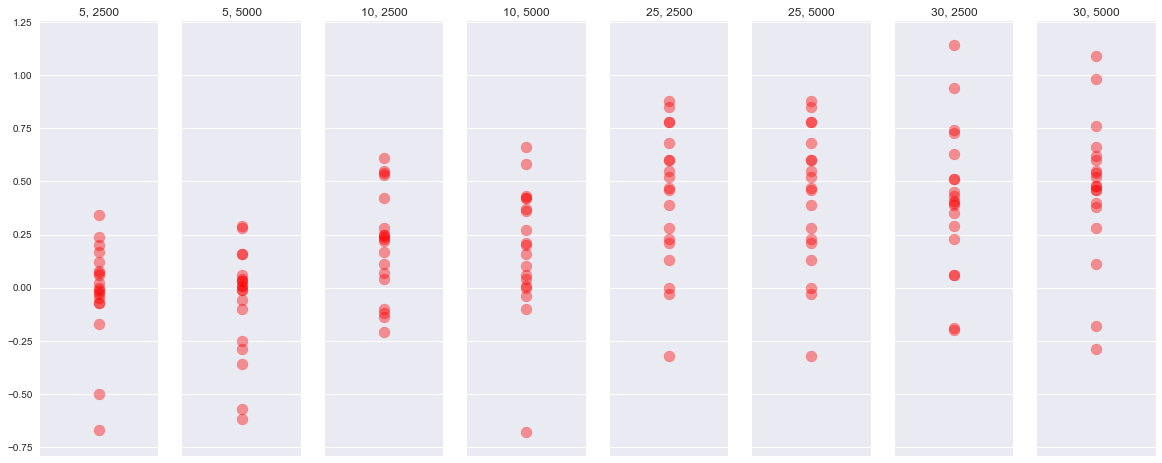

In [217]:
lux = np.full(len(algae), 2500)
lux2 = np.full(len(algae), 5000)

fig3, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1, 8, sharey=True, figsize=(20,8))
ax1.scatter(lux, rate_5_2500, label=algae, alpha=0.4, s=120, c='red')
ax2.scatter(lux2, rate_5_5000, alpha=0.4,  s=120, c='red')
ax3.scatter(lux, rate_10_2500, alpha=0.4, s=120, c='red')
ax4.scatter(lux2, rate_10_5000, alpha=0.4, s=120, c='red')
ax5.scatter(lux, rate_25_2500, alpha=0.4, s=120, c='red')
ax6.scatter(lux2, rate_25_5000, alpha=0.4, s=120, c='red')
ax7.scatter(lux, rate_30_2500, alpha=0.4, s=120, c='red')
ax8.scatter(lux2, rate_30_5000, alpha=0.4, s=120, c='red')

num = np.arange(3)
lux_label = [0]

ax1.set_xticks(np.arange(0))
ax1.set_title("5, 2500")
ax2.set_xticks(np.arange(0))
ax2.set_title("5, 5000")
ax3.set_xticks(np.arange(0))
ax3.set_title("10, 2500")
ax4.set_xticks(np.arange(0))
ax4.set_title("10, 5000")
ax5.set_xticks(np.arange(0))
ax5.set_title("25, 2500")
ax6.set_xticks(np.arange(0))
ax6.set_title("25, 5000")
ax7.set_xticks(np.arange(0))
ax7.set_title("30, 2500")
ax8.set_xticks(np.arange(0))
ax8.set_title("30, 5000")
#ax1.set_yticklabels()

#plt.savefig('dotplot_algae', dpi=300)
plt.show()

The above visualization is more comprehensive and definitely looks better. I have inserted annotations to get the species with the highest growth rate per condition as well. Now, using this visualization, I can also deduce that as temperatures increase, on average, the growth rates of the different species of algae also increases. This answers my #3 question! It's fascinating that temperature really do affect growth rates of algae.

### 2. What condition is the best and worst for every specific species of algae?

This answer to this question cannot be derived from the visualization above. I've decided to create another one to get its results.

In [218]:
df2

Growth Rate                                \
Temperature                              5           10          25         
Light Intensity                        2500  5000  2500  5000  2500  5000   
Species                                                                     
Caloneis schroderi                    -0.50 -0.01  0.25 -0.10  0.30  0.28   
Chaetoceros gracilis                  -0.05 -0.01  0.07  0.16  0.39  0.52   
Chaetoceros simplex                   -0.01 -0.06  0.55  0.27  0.52  0.47   
Chlorella ellipsoidea                  0.02  0.03  0.53  0.58  0.85  0.88   
Chlorella stigmatophora                0.24  0.01  0.24  0.36  0.56  0.78   
Chlorella vulgaris (freshwater)        0.00 -0.25  0.17  0.21  0.67  0.68   
Cyclotella sp. NUFP-9                  0.08  0.16 -0.10  0.00  0.00  0.00   
Dunaniella tertiolecta                 0.17  0.28  0.42  0.43  0.64  0.60   
Hanzchia marina                       -0.07 -0.36 -0.21 -0.68  0.15  0.21   
Isochrysis aff. galbana               -0.67 -0.62 -0.14  0.06  0.81  0.78   
Isochrysis galbana                    -0.07 -0.57  0.25  0.42  0.55  0.55   
Nannochloris salina                    0.07  0.06  0.54  0.04 -0.34 -0.32   
Nannochlorois oculata                 -0.03  0.01  0.04  0.01  0.92  0.85   
Navicula incerta                       0.20  0.16  0.22  0.37  0.37  0.39   
Nitzscia sp.                           0.12 -0.10  0.23  0.20  0.29  0.23   
Skeletonema costatum                   0.34  0.29  0.61  0.66  0.67  0.60   
Tetraselmus suecica                   -0.02  0.04  0.28  0.42  0.44  0.46   
Thalassiosira fluviatilis              0.06  0.03  0.11  0.10  0.10 -0.03   
Thalassiosira sp.                     -0.17 -0.29 -0.12 -0.04  0.15  0.13   

                                             
Temperature                        30        
Light Intensity                  2500  5000  
Species                                      
Caloneis schroderi               0.29  0.38  
Chaetoceros gracilis             0.73  0.62  
Chaetoceros simplex              0.63  0.54  
Chlorella ellipsoidea            0.94  0.98  
Chlorella stigmatophora          0.39  0.66  
Chlorella vulgaris (freshwater) -0.20 -0.29  
Cyclotella sp. NUFP-9           -0.19 -0.18  
Dunaniella tertiolecta           0.45  0.60  
Hanzchia marina                  0.06  0.11  
Isochrysis aff. galbana          0.74  0.76  
Isochrysis galbana               0.51  0.52  
Nannochloris salina              0.06  0.46  
Nannochlorois oculata            1.14  1.09  
Navicula incerta                 0.35  0.48  
Nitzscia sp.                     0.40  0.46  
Skeletonema costatum             0.43  0.48  
Tetraselmus suecica              0.51  0.55  
Thalassiosira fluviatilis        0.23  0.28  
Thalassiosira sp.                0.41  0.40

Below is another messy code for getting the rates that I want. There are 19 species of algae in my dataset so I need 19 graphs to show these as well.

In [219]:
temp = ["5", "10", "25", "30"]

rate_schroderi = df.loc[(df['Species'] == 'Caloneis schroderi') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_schroderi2 = df.loc[(df['Species'] == 'Caloneis schroderi') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_gracilis = df.loc[(df['Species'] == 'Chaetoceros gracilis') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_gracilis2 = df.loc[(df['Species'] == 'Chaetoceros gracilis') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_simplex = df.loc[(df['Species'] == 'Chaetoceros simplex') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_simplex2 = df.loc[(df['Species'] == 'Chaetoceros simplex') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_ellipsoidea = df.loc[(df['Species'] == 'Chlorella ellipsoidea') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_ellipsoidea2 = df.loc[(df['Species'] == 'Chlorella ellipsoidea') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_stigmatophora = df.loc[(df['Species'] == 'Chlorella stigmatophora') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_stigmatophora2 = df.loc[(df['Species'] == 'Chlorella stigmatophora') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_vulgaris = df.loc[(df['Species'] == 'Chlorella vulgaris (freshwater)') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_vulgaris2 = df.loc[(df['Species'] == 'Chlorella vulgaris (freshwater)') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_Cyclotella = df.loc[(df['Species'] == 'Cyclotella sp. NUFP-9') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_Cyclotella2 = df.loc[(df['Species'] == 'Cyclotella sp. NUFP-9') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_tertiolecta = df.loc[(df['Species'] == 'Dunaniella tertiolecta') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_tertiolecta2 = df.loc[(df['Species'] == 'Dunaniella tertiolecta') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_marina = df.loc[(df['Species'] == 'Hanzchia marina') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_marina2 = df.loc[(df['Species'] == 'Hanzchia marina') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_Isochrysis = df.loc[(df['Species'] == 'Isochrysis aff. galbana') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_Isochrysis2 = df.loc[(df['Species'] == 'Isochrysis aff. galbana') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_galbana = df.loc[(df['Species'] == 'Isochrysis galbana') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_galbana2 = df.loc[(df['Species'] == 'Isochrysis galbana') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_salina = df.loc[(df['Species'] == 'Nannochloris salina') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_salina2 = df.loc[(df['Species'] == 'Nannochloris salina') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_oculata = df.loc[(df['Species'] == 'Nannochlorois oculata') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_oculata2 = df.loc[(df['Species'] == 'Nannochlorois oculata') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_incerta = df.loc[(df['Species'] == 'Navicula incerta') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_incerta2 = df.loc[(df['Species'] == 'Navicula incerta') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_Nitzscia = df.loc[(df['Species'] == 'Nitzscia sp.') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_Nitzscia2 = df.loc[(df['Species'] == 'Nitzscia sp.') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_costatum = df.loc[(df['Species'] == 'Skeletonema costatum') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_costatum2 = df.loc[(df['Species'] == 'Skeletonema costatum') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_suecica = df.loc[(df['Species'] == 'Tetraselmus suecica') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_suecica2 = df.loc[(df['Species'] == 'Tetraselmus suecica') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_fluviatilis = df.loc[(df['Species'] == 'Thalassiosira fluviatilis') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_fluviatilis2 = df.loc[(df['Species'] == 'Thalassiosira fluviatilis') & (df['Light Intensity'] == 5000)]['Growth Rate']

rate_Thalassiosira = df.loc[(df['Species'] == 'Thalassiosira sp.') & (df['Light Intensity'] == 2500)]['Growth Rate']
rate_Thalassiosira2 = df.loc[(df['Species'] == 'Thalassiosira sp.') & (df['Light Intensity'] == 5000)]['Growth Rate']

Below is the code for plotting the line charts.

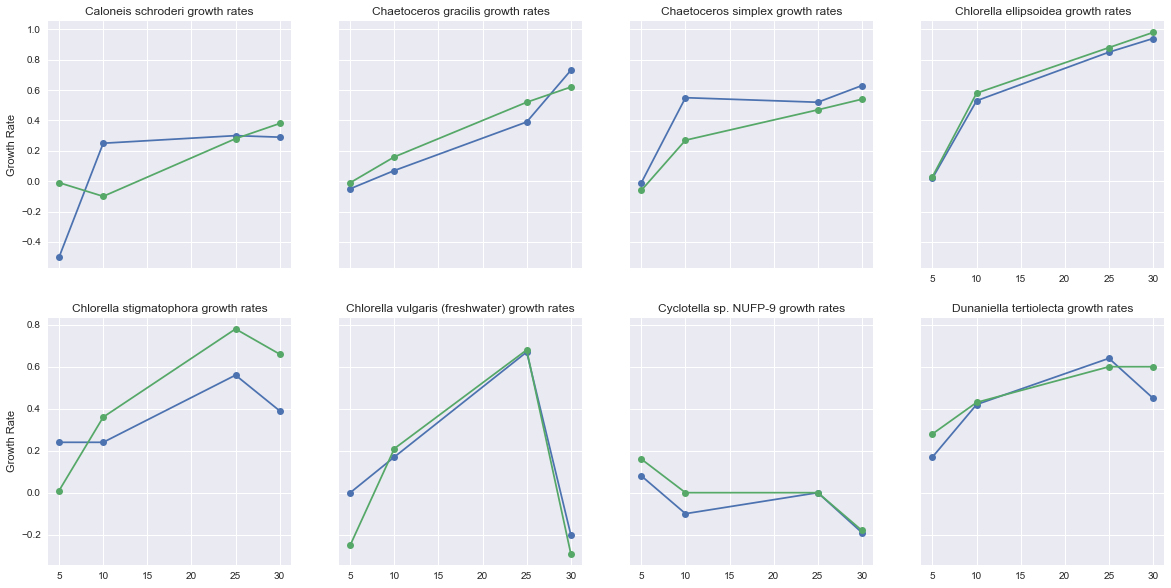

In [221]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(241, sharex=ax5)
plt.plot(temp, rate_schroderi, marker='o')
plt.plot(temp, rate_schroderi2, marker='o')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Growth Rate')
plt.title('Caloneis schroderi growth rates')

ax2 = fig.add_subplot(242, sharey=ax1, sharex=ax6)
plt.plot(temp, rate_gracilis, marker='o')
plt.plot(temp, rate_gracilis2, marker='o')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title('Chaetoceros gracilis growth rates')

ax3 = fig.add_subplot(243, sharey=ax1, sharex=ax7)
plt.plot(temp, rate_simplex, marker='o')
plt.plot(temp, rate_simplex2, marker='o')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('Chaetoceros simplex growth rates')

ax4 = fig.add_subplot(244, sharey=ax1, sharex=ax8)
plt.plot(temp, rate_ellipsoidea, marker='o')
plt.plot(temp, rate_ellipsoidea2, marker='o')
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('Chlorella ellipsoidea growth rates')

ax5 = fig.add_subplot(245)
plt.plot(temp, rate_stigmatophora, marker='o')
plt.plot(temp, rate_stigmatophora2, marker='o')
plt.ylabel('Growth Rate')
plt.title('Chlorella stigmatophora growth rates')

ax6 = fig.add_subplot(246, sharey=ax5)
plt.plot(temp, rate_vulgaris, marker='o')
plt.plot(temp, rate_vulgaris2, marker='o')
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('Chlorella vulgaris (freshwater) growth rates')

ax7 = fig.add_subplot(247, sharey=ax5)
plt.plot(temp, rate_Cyclotella, marker='o')
plt.plot(temp, rate_Cyclotella2, marker='o')
plt.setp(ax7.get_yticklabels(), visible=False)
plt.title('Cyclotella sp. NUFP-9 growth rates')

ax8 = fig.add_subplot(248, sharey=ax5)
plt.plot(temp, rate_tertiolecta, marker='o')
plt.plot(temp, rate_tertiolecta2, marker='o')
plt.setp(ax8.get_yticklabels(), visible=False)
plt.title('Dunaniella tertiolecta growth rates')

# plt.savefig('line2-1_algae', dpi=300)
plt.show()

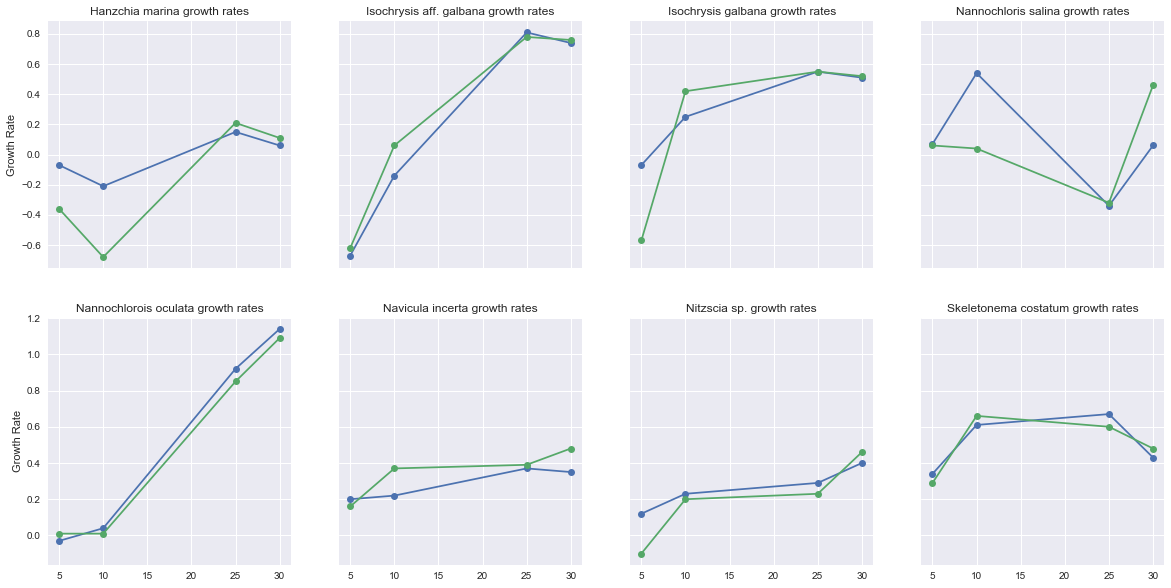

In [224]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(241, sharex=ax5)
plt.plot(temp, rate_marina, marker='o')
plt.plot(temp, rate_marina2, marker='o')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Growth Rate')
plt.title('Hanzchia marina growth rates')

ax2 = fig.add_subplot(242, sharey=ax1, sharex=ax6)
plt.plot(temp, rate_Isochrysis, marker='o')
plt.plot(temp, rate_Isochrysis2, marker='o')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title('Isochrysis aff. galbana growth rates')

ax3 = fig.add_subplot(243, sharey=ax1, sharex=ax7)
plt.plot(temp, rate_galbana, marker='o')
plt.plot(temp, rate_galbana2, marker='o')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('Isochrysis galbana growth rates')

ax4 = fig.add_subplot(244, sharey=ax1, sharex=ax8)
plt.plot(temp, rate_salina, marker='o')
plt.plot(temp, rate_salina2, marker='o')
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.title('Nannochloris salina growth rates')

ax5 = fig.add_subplot(245)
plt.plot(temp, rate_oculata, marker='o')
plt.plot(temp, rate_oculata2, marker='o')
plt.ylabel('Growth Rate')
plt.title('Nannochlorois oculata growth rates')

ax6 = fig.add_subplot(246, sharey=ax5)
plt.plot(temp, rate_incerta, marker='o')
plt.plot(temp, rate_incerta2, marker='o')
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('Navicula incerta growth rates')

ax7 = fig.add_subplot(247, sharey=ax5)
plt.plot(temp, rate_Nitzscia, marker='o')
plt.plot(temp, rate_Nitzscia2, marker='o')
plt.setp(ax7.get_yticklabels(), visible=False)
plt.title('Nitzscia sp. growth rates')

ax8 = fig.add_subplot(248, sharey=ax5)
plt.plot(temp, rate_costatum, marker='o')
plt.plot(temp, rate_costatum2, marker='o')
plt.setp(ax8.get_yticklabels(), visible=False)
plt.title('Skeletonema costatum growth rates')

# plt.savefig('line2-2_algae', dpi=300)
plt.show()

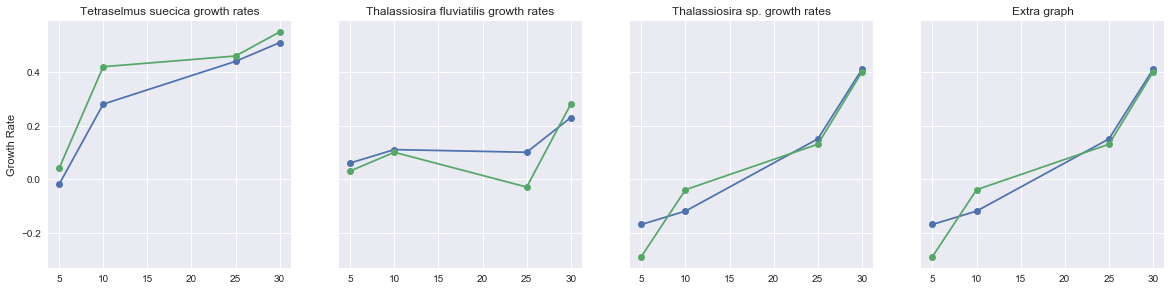

In [223]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(241)
plt.plot(temp, rate_suecica, marker='o')
plt.plot(temp, rate_suecica2, marker='o')
plt.ylabel('Growth Rate')
plt.title('Tetraselmus suecica growth rates')

ax2 = fig.add_subplot(242, sharey=ax1)
plt.plot(temp, rate_fluviatilis, marker='o')
plt.plot(temp, rate_fluviatilis2, marker='o')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('Thalassiosira fluviatilis growth rates')

ax3 = fig.add_subplot(243, sharey=ax1)
plt.plot(temp, rate_Thalassiosira, marker='o')
plt.plot(temp, rate_Thalassiosira2, marker='o')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.title('Thalassiosira sp. growth rates')

ax4 = fig.add_subplot(244, sharey=ax1)
plt.plot(temp, rate_Thalassiosira, marker='o')
plt.plot(temp, rate_Thalassiosira2, marker='o')
plt.setp(ax4.get_yticklabels(), visible=False)
plt.title('Extra graph')

# plt.savefig('line2-3_algae', dpi=300)
plt.show()

By looking at the individual line charts, we can easily see what types of conditions are best and worst for each species of algae. We can also confirm our initial hypothesis that on average, higher temperatures mean higher growth rates. But looking at the charts, we can see that not all species follow this. There are a few exceptions, and they should not be ignored.

That's it for this week's challenge! I had fun wrangling the data and experimenting on chart types. They may not be the best but I've learned a lot. Also, I love seaborn! I started plotting using matplotlib only and got discouraged by the results as it was too basic for my eyes. Then, I decided to check out seaborn and it suddenly became pretty. On to the next challenge!